In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#importing dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Performing EDA

#Droping irrelevant columns
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
#Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9569 non-null   int64  
 1   Geography        9569 non-null   object 
 2   Gender           9569 non-null   object 
 3   Age              9569 non-null   int64  
 4   Tenure           9569 non-null   int64  
 5   Balance          9569 non-null   float64
 6   NumOfProducts    9569 non-null   int64  
 7   HasCrCard        9569 non-null   int64  
 8   IsActiveMember   9569 non-null   int64  
 9   EstimatedSalary  9569 non-null   float64
 10  Exited           9569 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 897.1+ KB


In [23]:
#Check for Null Values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
#Check for Duplicates

df.duplicated().sum()

0

In [27]:
#check number of rows and columns

df.shape

(10000, 11)

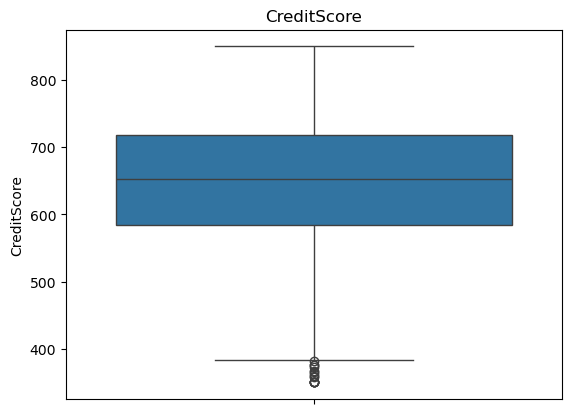

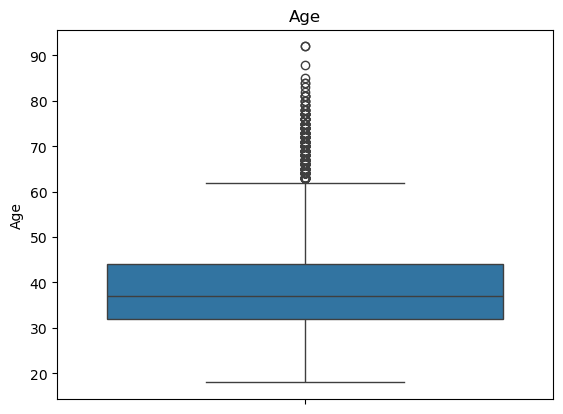

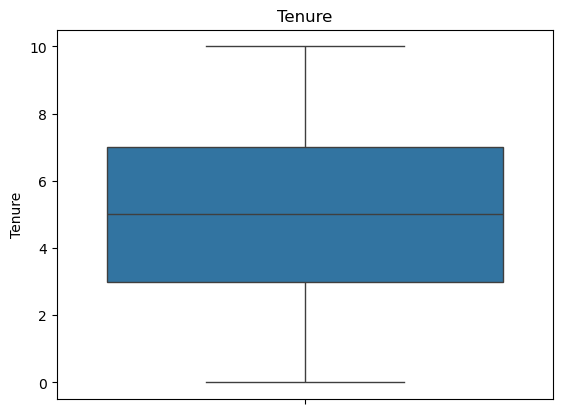

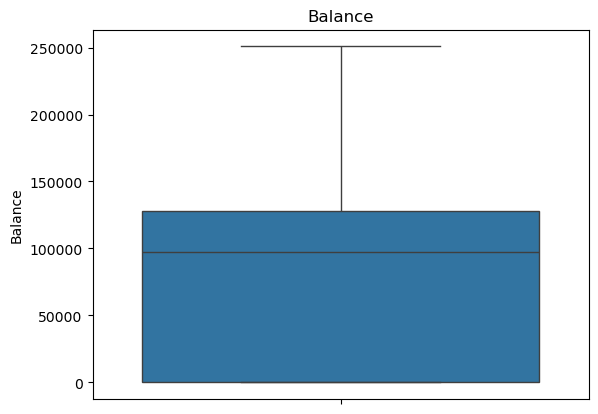

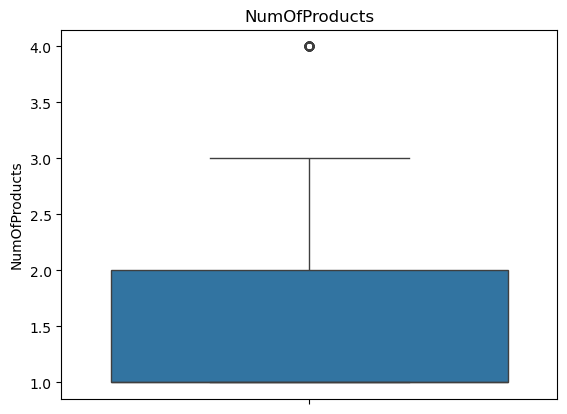

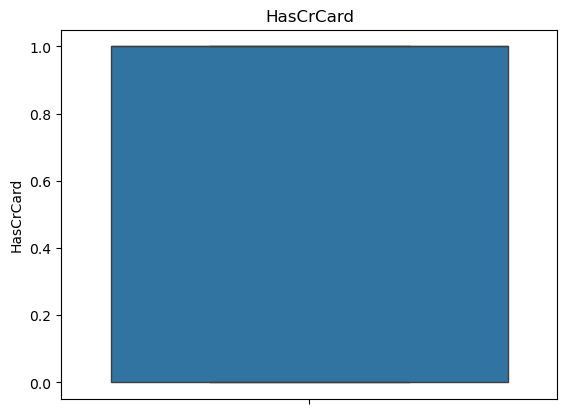

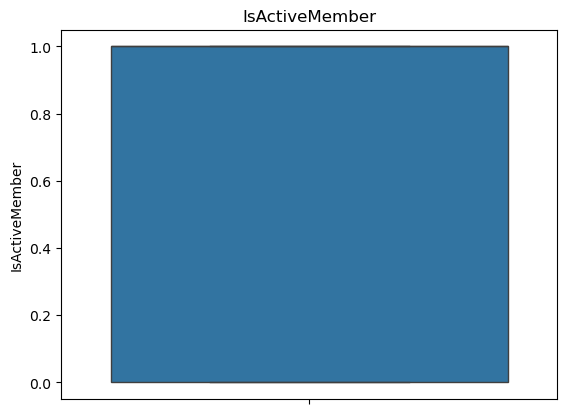

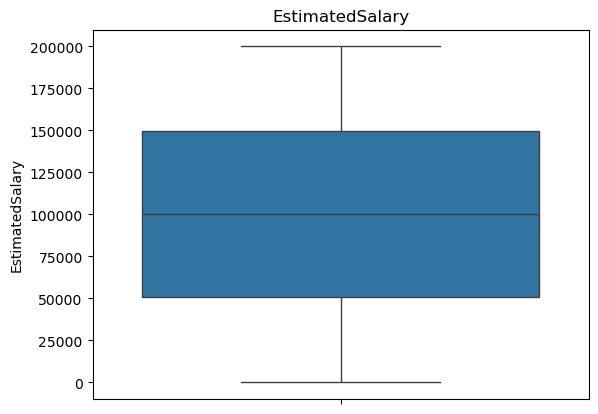

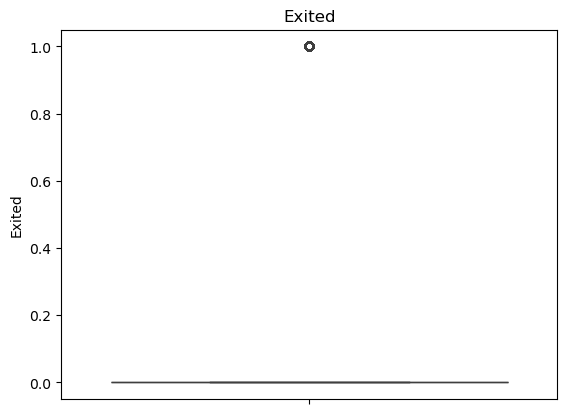

In [29]:
#Checking Outliers

for i in df.columns:
  if df[i].dtypes != object:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [31]:
#Removing Outliers

col_names=['CreditScore','Age','NumOfProducts']
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]


Q1 = df.CreditScore.quantile(0.25)
Q3 = df.CreditScore.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.CreditScore >= Q1 - 1.5*IQR) & (df.CreditScore <= Q3 + 1.5*IQR)]

Q1 = df.NumOfProducts.quantile(0.25)
Q3 = df.NumOfProducts.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.NumOfProducts >= Q1 - 1.5*IQR) & (df.NumOfProducts <= Q3 + 1.5*IQR)]

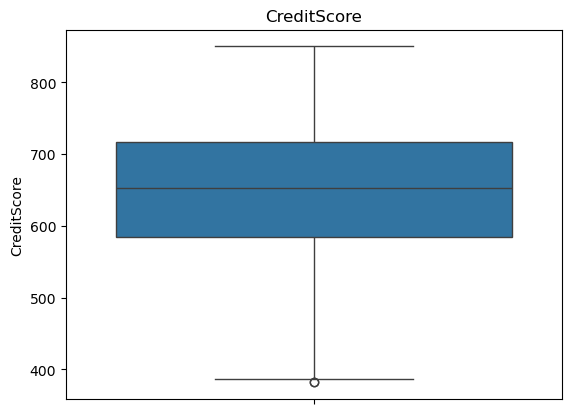

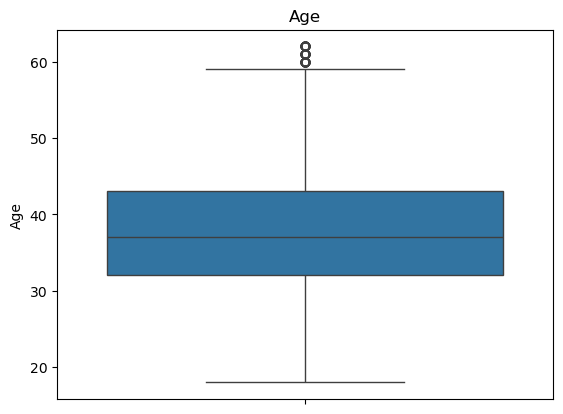

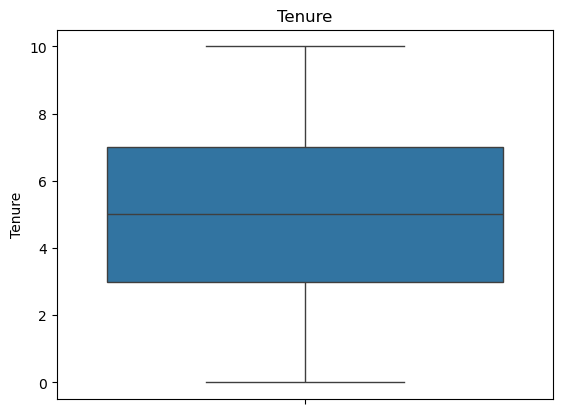

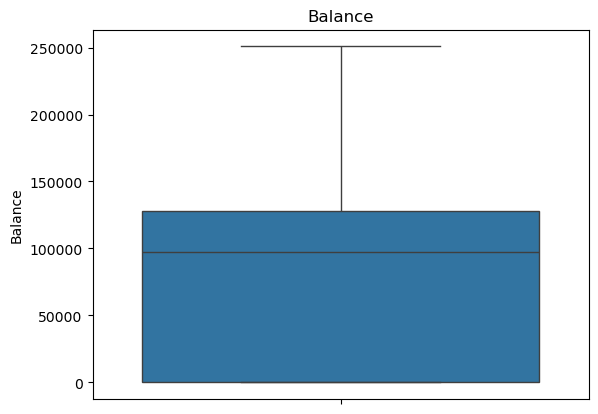

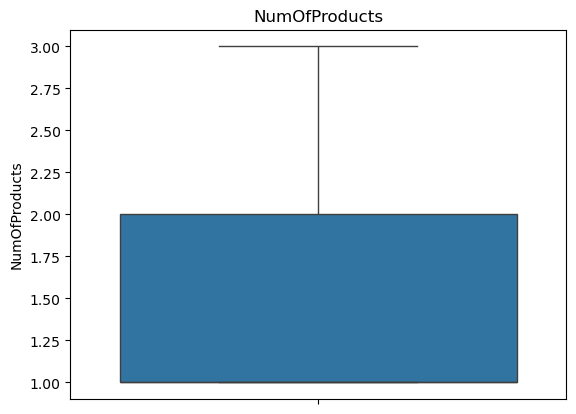

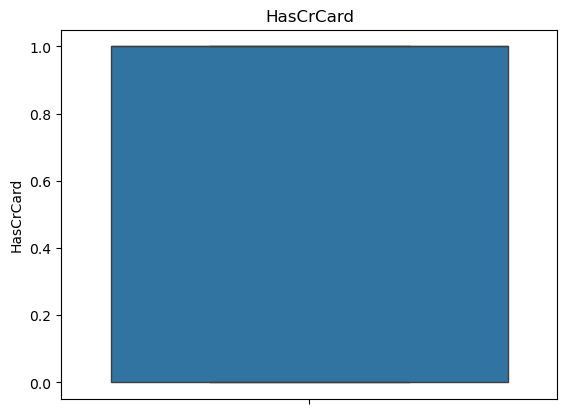

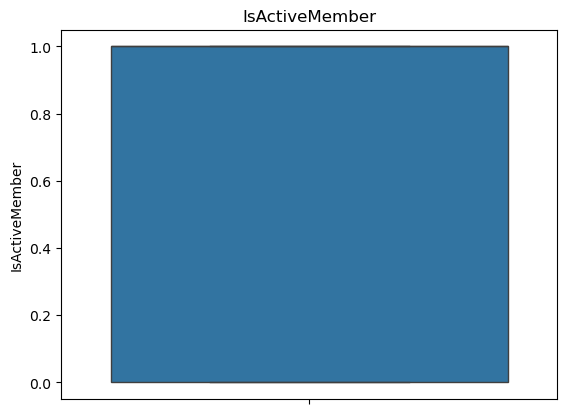

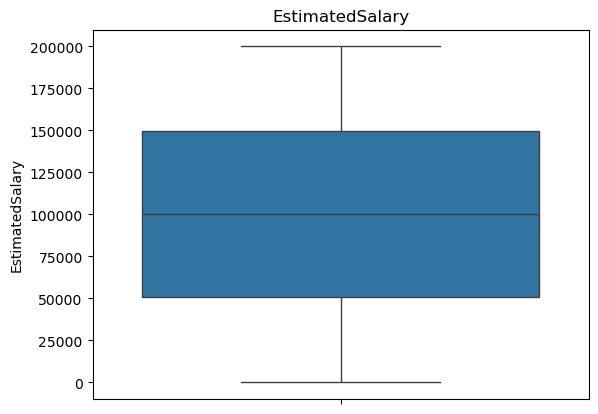

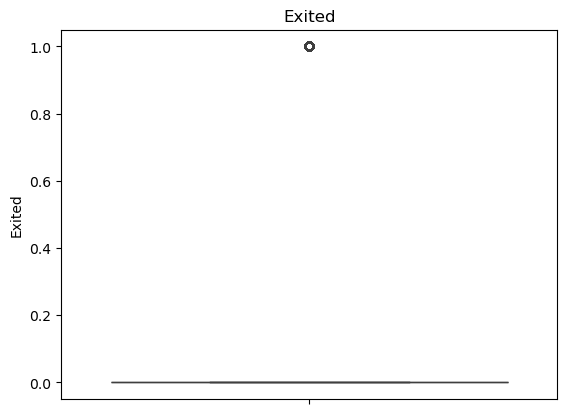

In [33]:
#After Removing Outliers

for i in df.columns:
  if df[i].dtypes != object:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [39]:
#Statistical summary of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9569.000000,9569.000000,9569.000000,9569.000000,9569.000000,9569.000000,9569.000000,9569.000000,9569.000000
mean,650.662661,37.735605,5.014840,76426.067825,1.515937,0.705194,0.503710,100102.487244,0.197722
std,96.127736,8.782543,2.888173,62417.820208,0.549762,0.455979,0.500012,57525.696669,0.398302
min,382.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51016.020000,0.000000
50%,652.000000,37.000000,5.000000,97086.400000,1.000000,1.000000,1.000000,100130.950000,0.000000
75%,717.000000,43.000000,7.000000,127609.590000,2.000000,1.000000,1.000000,149471.130000,0.000000
max,850.000000,62.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


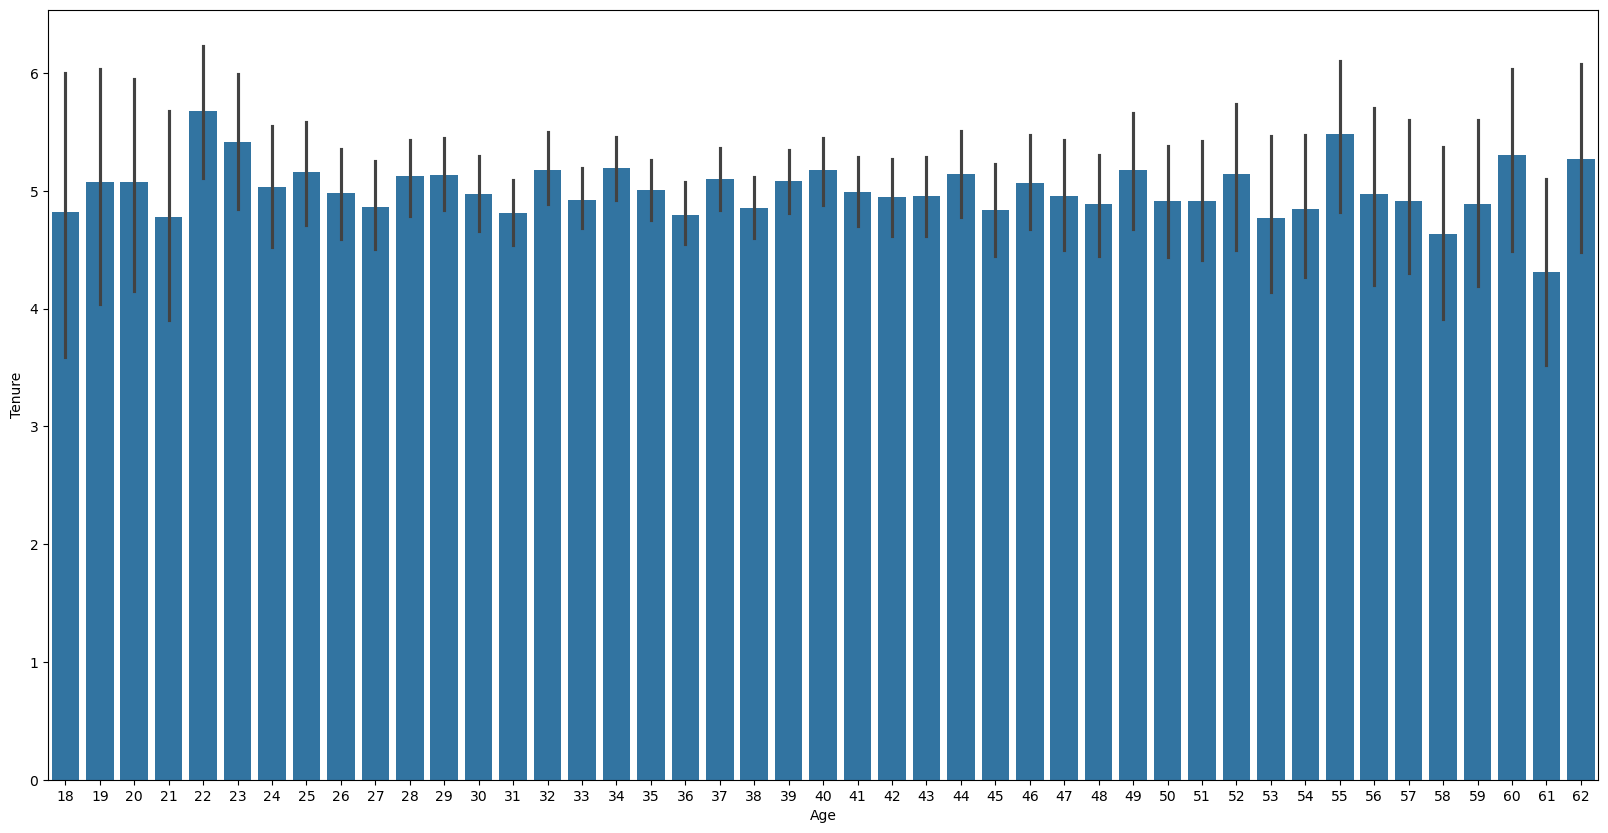

In [41]:
## Data Visualization

# Age distibution by Tenure

plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Age',y='Tenure')
plt.show()

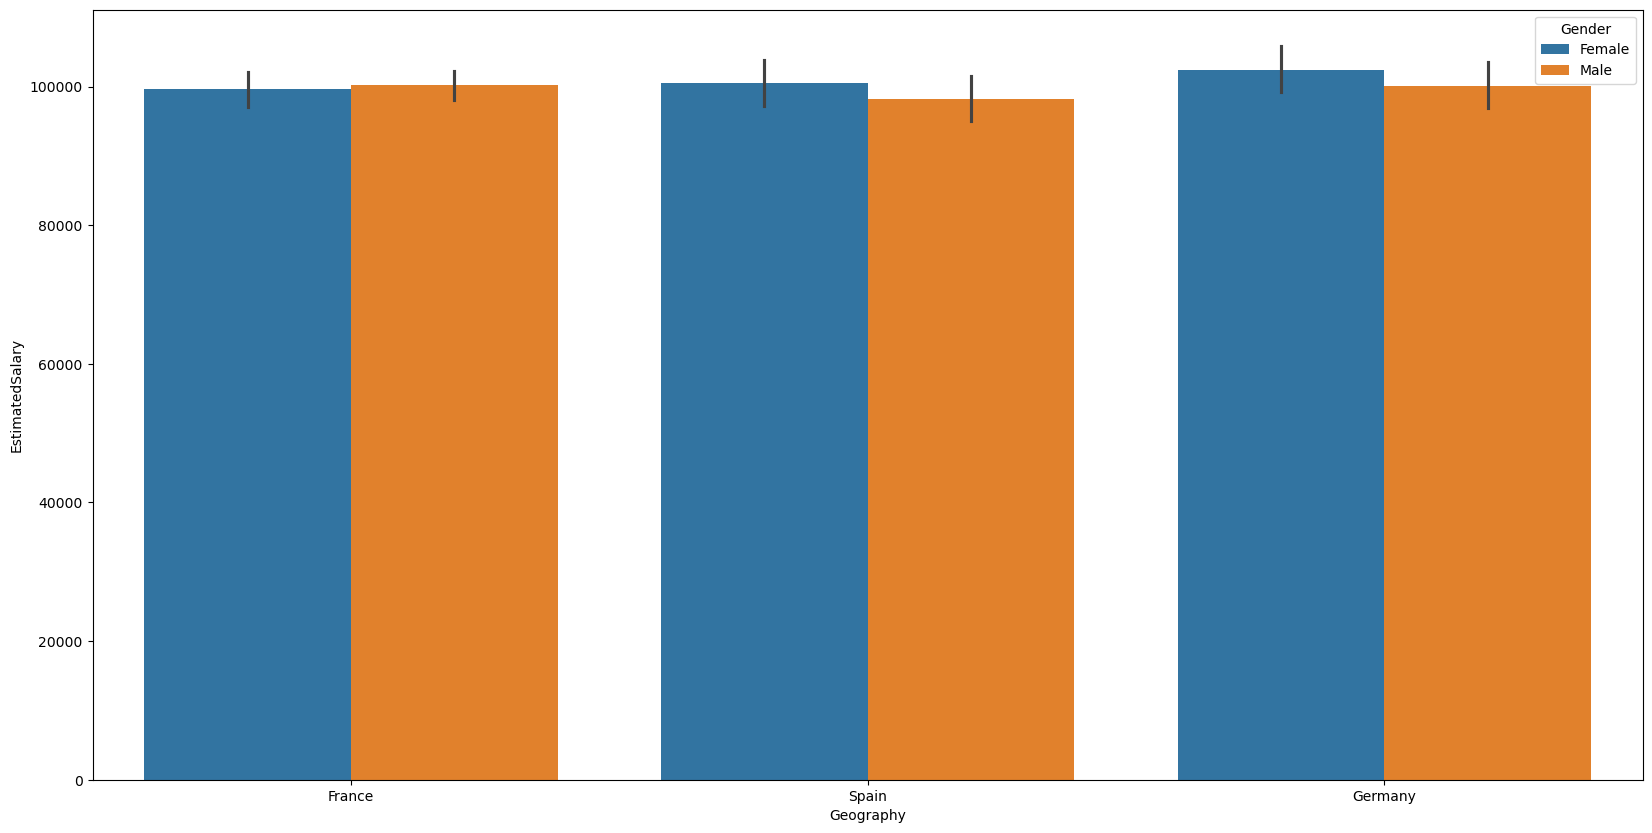

In [43]:
#Estimated Salary by Geography and Gender

plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Geography',y='EstimatedSalary', hue = "Gender")
plt.show()

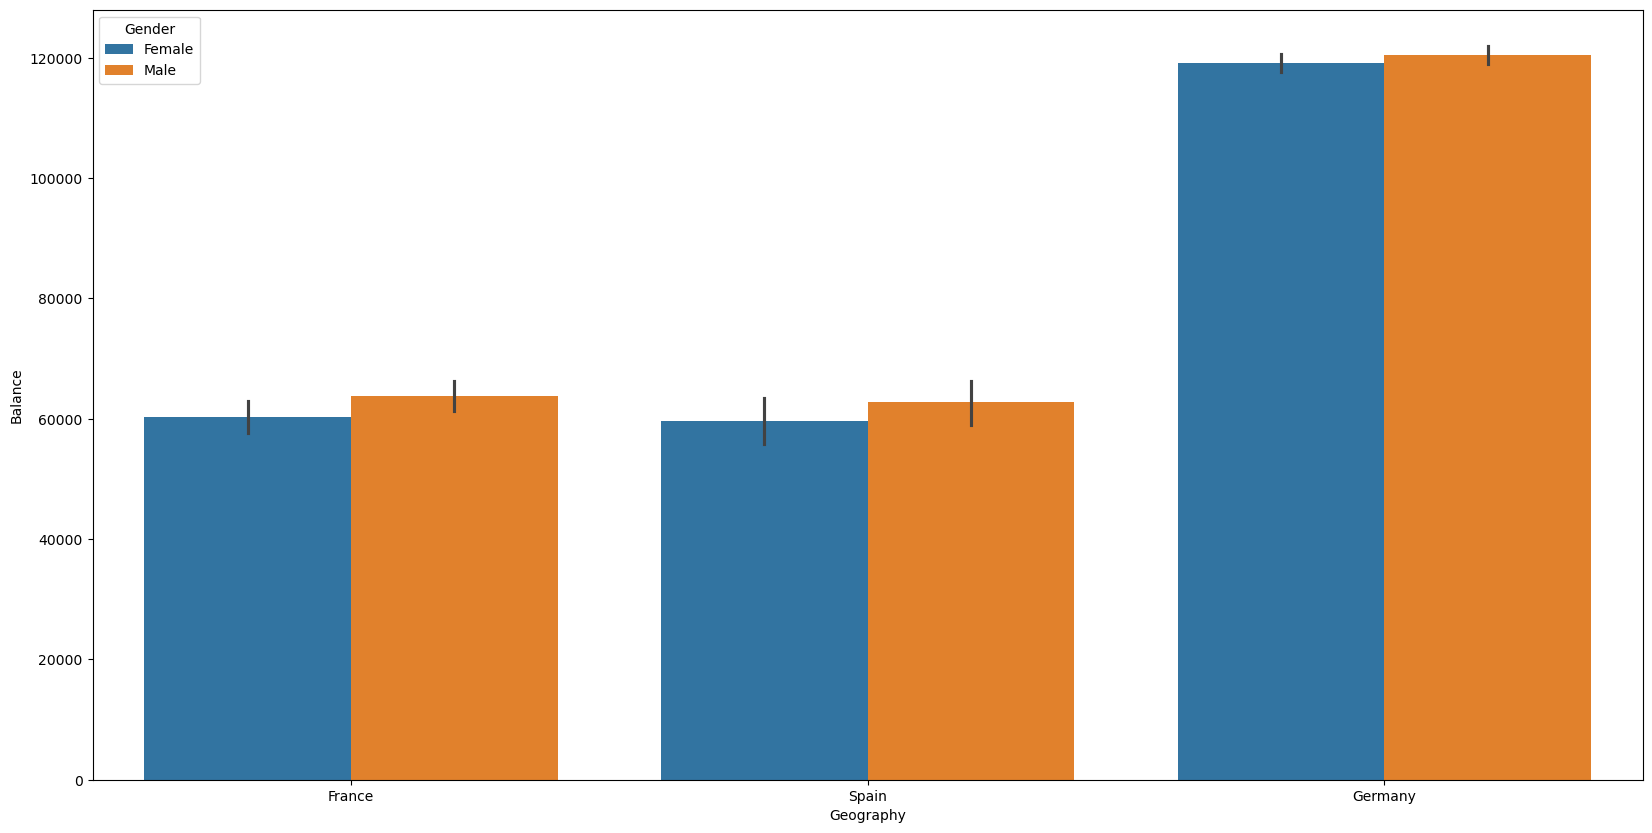

In [45]:
#Balance by Geography and Gender

plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Geography',y='Balance', hue = "Gender")
plt.show()

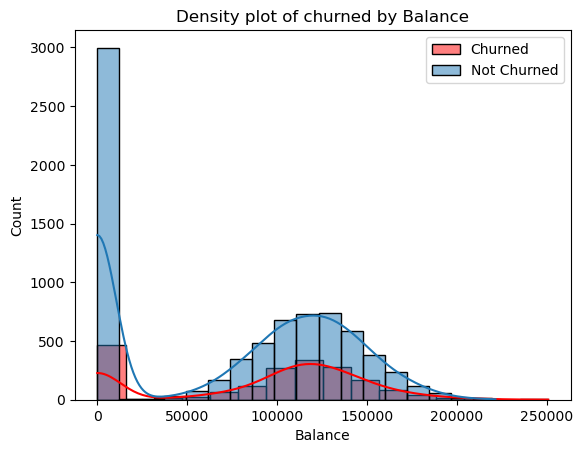

In [47]:
#Total balance versus customers Churned and not churned. People having low Balance have churned.

sns.histplot(df[df['Exited']== 1]['Balance'],  label='Churned', kde=True, color = 'red')
sns.histplot(df[df['Exited']== 0]['Balance'], label='Not Churned', kde=True)
plt.legend()
plt.title('Density plot of churned by Balance')
plt.show()

<Axes: >

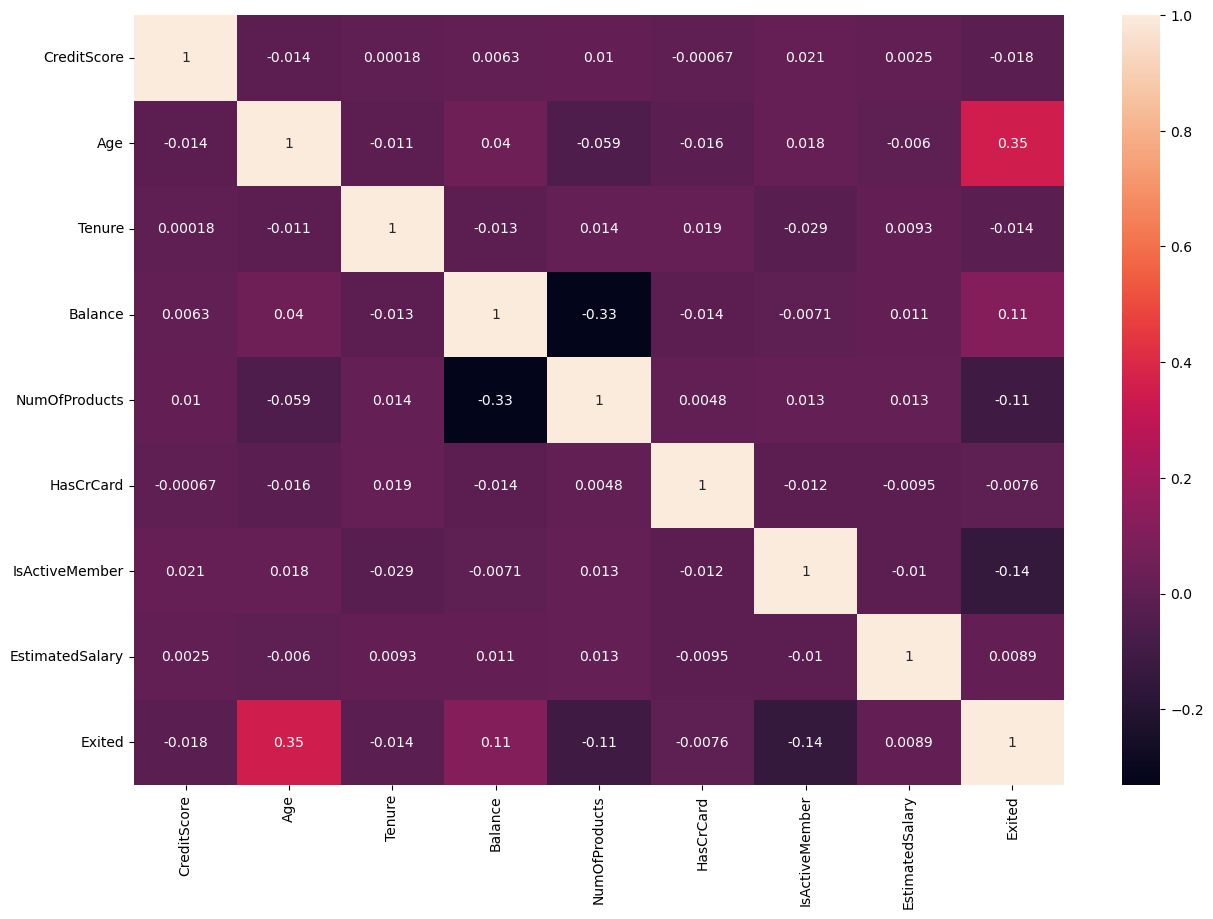

In [49]:
# Checking for colrelation between columns. Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [55]:
# Data preprocessing

# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
  if df[i].dtypes == "object":
    df[i] = le.fit_transform(df[i])

In [57]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [59]:
#Model Building

#Creating x and y variables for model
X = df.drop('Exited',axis=1).to_numpy()
y = df['Exited'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [62]:
##Logistic Reggression

#Script for Logistical Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Logistic Regression', LogisticRegression(solver='liblinear',random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))

[[1485   51]
 [ 270  108]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1536
           1       0.68      0.29      0.40       378

    accuracy                           0.83      1914
   macro avg       0.76      0.63      0.65      1914
weighted avg       0.81      0.83      0.80      1914



In [108]:
##Improved Logistic Reggression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X and y are your feature and target datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Apply StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
# Create base models
logreg = LogisticRegression(solver='liblinear', random_state=100)
rf = RandomForestClassifier(random_state=100)



# Apply SMOTE to the training data
smote = SMOTE(random_state=100)
x_train_scaled, y_train_smote = smote.fit_resample(x_train_scaled, y_train)


# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('rf', rf)], voting='hard')

# Train the Voting Classifier
voting_clf.fit(x_train_scaled, y_train_smote)

# Step 5: Make predictions and evaluate
predictions = voting_clf.predict(x_test_scaled)

# Output results
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, target_names=['0', '1']))
print(accuracy_score(y_test, predictions))

[[1433   99]
 [ 203  179]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      1532
           1       0.64      0.47      0.54       382

    accuracy                           0.84      1914
   macro avg       0.76      0.70      0.72      1914
weighted avg       0.83      0.84      0.83      1914

0.8422152560083594


In [64]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('Decision Tree', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: Decision Tree
[[1360  176]
 [ 193  185]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1536
           1       0.51      0.49      0.50       378

    accuracy                           0.81      1914
   macro avg       0.69      0.69      0.69      1914
weighted avg       0.80      0.81      0.81      1914



In [66]:
#Script for SVM and Naive Bayes

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: SVM
[[1536    0]
 [ 378    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1536
           1       0.00      0.00      0.00       378

    accuracy                           0.80      1914
   macro avg       0.40      0.50      0.45      1914
weighted avg       0.64      0.80      0.71      1914


Estimator: Naive Bayes
[[1476   60]
 [ 254  124]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1536
           1       0.67      0.33      0.44       378

    accuracy                           0.84      1914
   macro avg       0.76      0.64      0.67      1914
weighted avg       0.82      0.84      0.81      1914



C:\Users\ujjva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
## Neural Networks

#Building Neural Network model
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5,4,5),max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['0','1']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names))

[[1476   60]
 [ 216  162]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1536
           1       0.73      0.43      0.54       378

    accuracy                           0.86      1914
   macro avg       0.80      0.69      0.73      1914
weighted avg       0.84      0.86      0.84      1914



In [92]:
# K Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Create x (we ignore the y variable)
x = df.drop('Exited', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

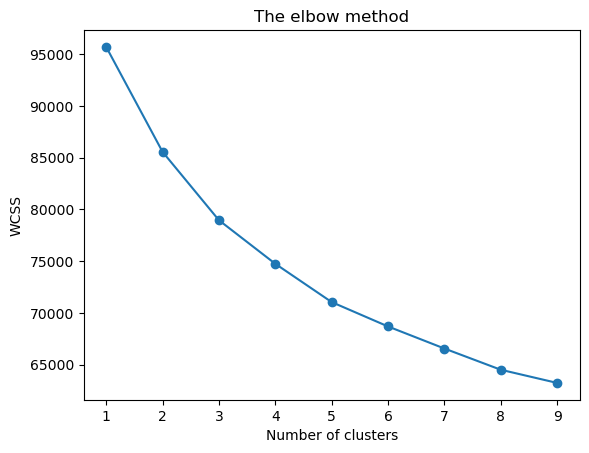

In [94]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()  

For n_clusters= 2, The Silhouette Coefficient is 0.10513369178650807
For n_clusters= 3, The Silhouette Coefficient is 0.07366145759927585
For n_clusters= 4, The Silhouette Coefficient is 0.06947149586693215
For n_clusters= 5, The Silhouette Coefficient is 0.04674228194685454
For n_clusters= 6, The Silhouette Coefficient is 0.03277394993344881
For n_clusters= 7, The Silhouette Coefficient is 0.029979255745135238
For n_clusters= 8, The Silhouette Coefficient is 0.02952576936720003
For n_clusters= 9, The Silhouette Coefficient is 0.02047871314067856


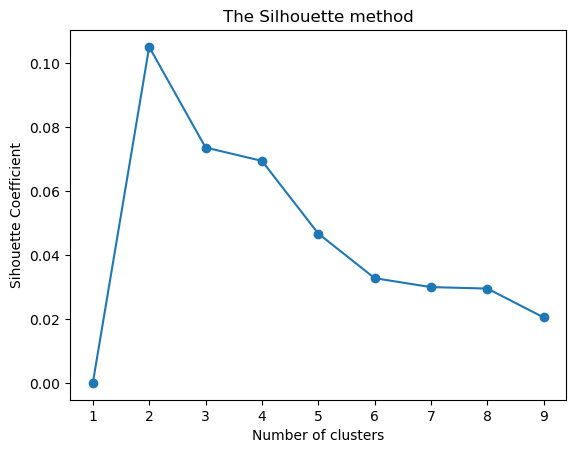

In [96]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show() 

In [98]:
#Create KMeans with 2 Clusters

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Add Prediction column to dataset
dataset2= df.drop('Exited', axis=1)
dataset2['New Cluster']=kmeans.labels_
dataset2['New Cluster'] = dataset2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New Cluster
0,619,0,0,42,2,0.00,1,1,1,101348.88,Cluster 1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,Cluster 1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,Cluster 2
3,699,0,0,39,1,0.00,2,0,0,93826.63,Cluster 2
4,850,2,0,43,2,125510.82,1,1,1,79084.10,Cluster 1


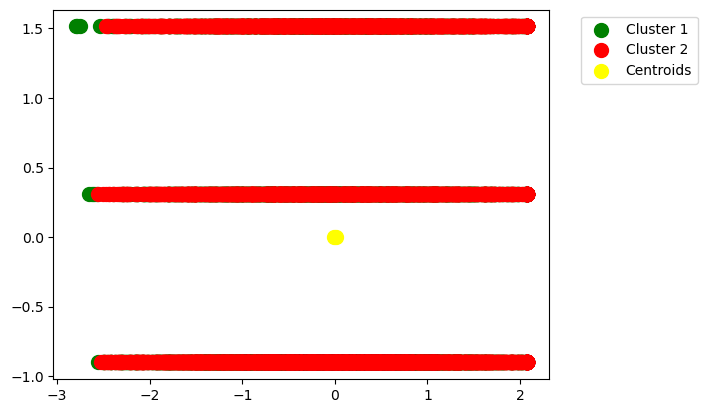

In [102]:
#Plot of 2 Clusters

plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_
            transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)